In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import ast

csv_file_path = "processed_hourly_2015.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

colData = df.columns.tolist()

for col in colData:
    if col == "input" or col == 'output':
        df[col] = df[col].apply(ast.literal_eval)
        
df = df[df['input'].apply(len) == 60]

        
# input_column = df['input'].values.reshape(-1, 1)

input_column = input_data = np.array(df['input'].tolist())

scaler = MinMaxScaler(feature_range=(-1, 1))
input_data_scaled = scaler.fit_transform(input_data)

# Split the data into training and testing sets
train_data = input_data_scaled[:800]
test_data = input_data_scaled[800:]


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 45)             │         2,745 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 30)             │         1,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 45)             │         1,395 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 60)             │         2,760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,280 (32.34 KB)

 Trainable params: 8,280 (32.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1907   
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0339 
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013     
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013     
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

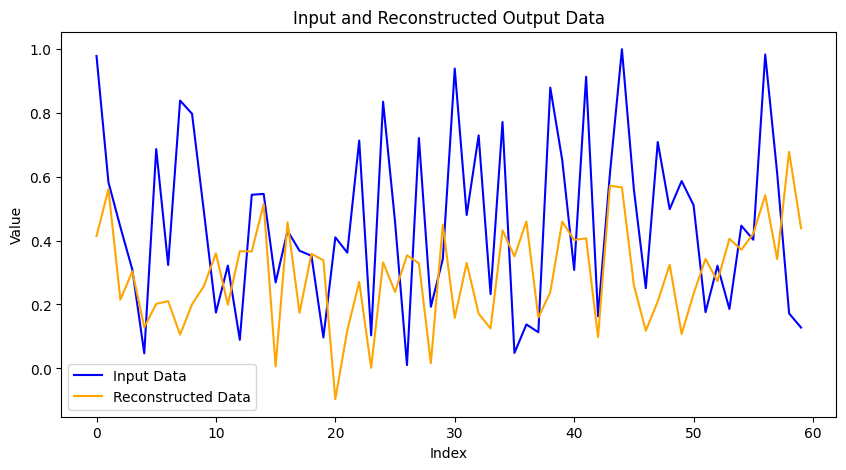

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1601 
Test loss: 0.1616218537092209


In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Define the input size
input_size = 60

# Input layer
input_layer = Input(shape=(input_size,))

# Encoder
encoded = Dense(45, activation='tanh')(input_layer)
encoded = Dense(30, activation='tanh')(encoded)

# Decoder
decoded = Dense(45, activation='tanh')(encoded)
decoded = Dense(input_size, activation='tanh')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Display the model summary
autoencoder.summary()


# Train the autoencoder
autoencoder.fit(train_data, train_data, epochs=50)

# Predict using the autoencoder
encoded_data = autoencoder.predict(test_data)

combined_data = np.concatenate((test_data[1], encoded_data[1]))

for i in range(len(encoded_data)):
    inputData = test_data[i]
    outputData = encoded_data[i]
    mse = np.mean((input_data - outputData) ** 2)
    print(inputData)
    print(outputData)
    print("Mean Squared Error (MSE):", mse)



plt.figure(figsize=(10, 5))
plt.plot(combined_data[:60], label='Input Data', color='blue')
plt.plot(combined_data[60:], label='Reconstructed Data', color='orange')
plt.title('Input and Reconstructed Output Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Save the model
# autoencoder.save('autoencoder_model.h5')

loss = autoencoder.evaluate(test_data, test_data)
print(f'Test loss: {loss}')
